In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline


2022-03-23 18:00:25.226440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-23 18:00:25.226456: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from ML_classes.BasicModel import Baseline


In [3]:
df = pd.read_csv('./data/ouput.csv')
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

#max_value_energy = df["energy(kWh/hh)"].max()
#df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)
# Sorting the values
#df.sort_values('tstp', inplace=True)

In [4]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000181")
hh.pop("LCLid")
#make hourly if we wish
#hh = hh.set_index("tstp")
#hh = hh.resample("H").sum()
#hh = hh.reset_index()

hh_max = hh['energy(kWh/hh)'].max()
hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
#hh.sort_values('tstp', inplace=True)

/tmp/ipykernel_351940/1838150454.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)


In [5]:
hh.max()

tstp              2014-02-28 00:00:00
energy(kWh/hh)                    1.0
dtype: object

In [6]:
#hh.plot( y ="energy(kWh/hh)", ylabel = "kWh")

In [7]:
#hh.tail(1000)

In [8]:
# Initiating the class
deep_learner = Baseline(
data = hh,
Y_var = 'energy(kWh/hh)',
train_test_split = 0.15
)

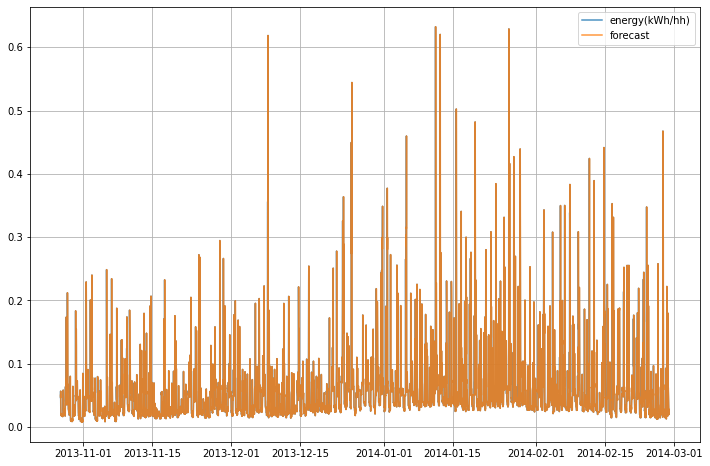

In [9]:
yhat = deep_learner.test_predictions()
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

/tmp/ipykernel_351940/3442304932.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc = fc.append(hat_frame)


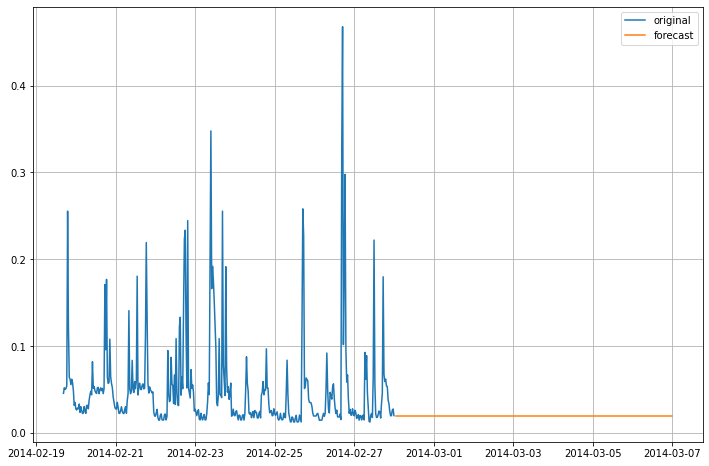

In [10]:

#Forecasting n steps ahead
n_ahead = 168
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y for y in yhat]

#Constructing the forecast dataframe
fc = hh.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)
#Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

In [11]:
deep_learner.evaluateMSE()

0.0020579244458563436

In [12]:
deep_learner.evaluateRMSE()

0.04536435214853557

In [13]:
deep_learner.evaluateMAE()

0.01816248787295715

In [14]:
deep_learner.evaluateMAPE()

26.07668360054149

In [15]:
f = deep_learner.test_predictions()
f

[0.05027203846493503,
 0.0467899920333427,
 0.05680087471344369,
 0.025027205078798513,
 0.021545158647206176,
 0.019151252130849932,
 0.01828074052295185,
 0.021327530339868166,
 0.021109903653984113,
 0.01871599713762787,
 0.01806311221561384,
 0.01871599713762787,
 0.021109903653984113,
 0.02023939204608603,
 0.017627857222391775,
 0.017627857222391775,
 0.020892275346646103,
 0.020457018731970082,
 0.017410228915053765,
 0.017192602229169712,
 0.020892275346646103,
 0.019368880438187942,
 0.016539717307155682,
 0.019151252130849932,
 0.025680088379358586,
 0.03068552971940908,
 0.05418933826829547,
 0.05854189468633194,
 0.0574537563925498,
 0.0467899920333427,
 0.029815016490057036,
 0.025897716686696597,
 0.026985854980478733,
 0.02829162158159888,
 0.02807399327426087,
 0.027203483287816743,
 0.021545158647206176,
 0.02023939204608603,
 0.021109903653984113,
 0.02263329856244227,
 0.023068553555664333,
 0.020674647039308092,
 0.019586508745525956,
 0.02002176373874802,
 0.020239

In [16]:
for i in range(len(f)):
    if f[i] == 0:
        print(i)

In [17]:
deep_learner.predictions()

[0.05157780506605518,
 0.05157780506605518,
 0.08139282479902013,
 0.03808487595436186,
 0.035908599366797585,
 0.02807399327426087,
 0.03743199427525574,
 0.05527747980498553,
 0.06877040891667885,
 0.046137107111328665,
 0.02807399327426087,
 0.02655059998725667,
 0.21240479989805336,
 0.11556040095002156,
 0.1151251378495297,
 0.11664853924380368,
 0.11251361113310523,
 0.10054407692987007,
 0.05614798654852174,
 0.08443961461593645,
 0.05527747980498553,
 0.05462459164006358,
 0.05723613132811971,
 0.05418933826829547,
 0.05114254845137916,
 0.041349294078616185,
 0.03917301749105191,
 0.024156693470900426,
 0.013057671686290325,
 0.018933623823511922,
 0.025027205078798513,
 0.021980415261882196,
 0.019586508745525956,
 0.02219804194776625,
 0.019368880438187942,
 0.021545158647206176,
 0.02023939204608603,
 0.019804135431410005,
 0.02219804194776625,
 0.02002176373874802,
 0.019151252130849932,
 0.021109903653984113,
 0.017627857222391775,
 0.01458106740547546,
 0.014363439098137

In [18]:
c = hh.tail(len(yhat)).copy()
c

,tstp,energy(kWh/hh)
158301,2014-02-24 12:30:00,0.023721
158302,2014-02-24 13:00:00,0.024157
158303,2014-02-24 13:30:00,0.017628
158304,2014-02-24 14:00:00,0.017410
158305,2014-02-24 14:30:00,0.022633
...,...,...
158464,2014-02-27 22:00:00,0.020022
158465,2014-02-27 22:30:00,0.020239
158466,2014-02-27 23:00:00,0.026333
158467,2014-02-27 23:30:00,0.027856


In [19]:
#train for all houses
lclid_list = df['LCLid'].unique().tolist()
#print(type(lclid_list))
mse = []
rmse = []
mae = []
mape = []
for lclid in lclid_list:
    #print(lclid)


    hh = find_household(lclid)
    hh.pop("LCLid")
    hh = hh.set_index("tstp")
    hh = hh.resample("H").sum()
    hh = hh.reset_index()

    hh_max = hh['energy(kWh/hh)'].max()
    hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
    
    deep_learner = Baseline(
        data = hh,
        Y_var = 'energy(kWh/hh)',
        train_test_split = 0.15
    )
    
    mse.append(deep_learner.evaluateMSE())
    rmse.append(deep_learner.evaluateRMSE())
    mae.append(deep_learner.evaluateMAE())
    mape.append(deep_learner.evaluateMAPE())
houses = pd.Series(data=lclid_list,name="lclid")
mse = pd.Series(data=mse,name="mse")
rmse = pd.Series(data=rmse,name="rmse")
mae = pd.Series(data=mae,name="mae")
mape = pd.Series(data=mape,name="mape")

res_df = pd.merge(houses, mse, right_index=True, left_index=True)
res_df["rmse"] = rmse
res_df["mae"] = mae
res_df["mape"] = mape


In [20]:
res_df

,lclid,mse,rmse,mae,mape
0,MAC000168,0.007067,0.084067,0.031487,89.550276
1,MAC000169,0.005209,0.072172,0.036304,38.203141
2,MAC000179,0.005271,0.072604,0.038569,43.017810
3,MAC000181,0.004081,0.063881,0.029661,32.666396
4,MAC000165,0.010526,0.102597,0.061170,29.015687
5,MAC000173,0.014597,0.120819,0.077572,52.480301
6,MAC000152,0.009232,0.096084,0.049431,66.189581
7,MAC000153,0.015446,0.124281,0.071226,47.676020
8,MAC000159,0.005331,0.073016,0.039622,31.342130
9,MAC000150,0.006660,0.081609,0.045880,43.237600
